# Smart Classroom Data Evaluation

## Setup

In [1]:
import psycopg2
import configparser
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

db_hostname = config['DATABASE']['HOSTNAME']
db_database = config['DATABASE']['DATABASE']
db_username = config['DATABASE']['USERNAME']
db_password = config['DATABASE']['PASSWORD']

### Test connection

In [3]:
conn = psycopg2.connect(
    host=db_hostname,
    database=db_database,
    user=db_username,
    password=db_password)


cur = conn.cursor()
        
print('PostgreSQL database version:')
cur.execute('SELECT version()')
print(cur.fetchone())

cur.close()
conn.close()

PostgreSQL database version:
('PostgreSQL 14.2 on x86_64-pc-linux-musl, compiled by gcc (Alpine 10.3.1_git20211027) 10.3.1 20211027, 64-bit',)


### Setup connection

In [4]:
conn = psycopg2.connect(
    host=db_hostname,
    database=db_database,
    user=db_username,
    password=db_password)

cur = conn.cursor()

## Evaluation

### Forschungsfragen

Wie ist der Zusammenhang zwischen Luftqualität und Frequenz bzw. Dauer des Lüftens?

--- Markdown ---

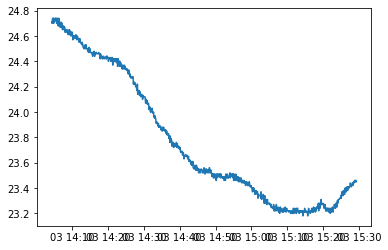

In [5]:
cur.execute('SELECT "time", "temperature" FROM api_measurement WHERE fk_measurement_station_id = 1 ORDER BY 1 DESC LIMIT 1000;')
data = cur.fetchall()
data = pd.DataFrame(data)

plt.plot(data[0], data[1])

Lässt sich anhand der Luftqualität etwas über die Anzahl Personen im Raum aussagen?

--- Markdown ---

Lässt sich aus den Messdaten der optimale Zeitpunkt zum Lüften (laufend) ermitteln?

--- Markdown ---

Welche weiteren Erkenntnisse lassen sich aus den erfassten Messdaten ableiten?

--- Markdown ---

Welche Erkenntnisse von Dritten können Sie allenfalls bestätigen/widerlegen?

--- Markdown ---

# Close Connection

In [6]:
cur.close()
conn.close()